# Linear Regression using TensorFlow

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [46]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [47]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [48]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

W = tf.Variable(rng.rand(), name='weights')
b = tf.Variable(rng.rand(), name='biases')

In [49]:
pred = tf.add(tf.multiply(X, W), b)

In [50]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2 * n_samples)

In [51]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [52]:
init = tf.global_variables_initializer()

Epoch: 0050 Cost: 0.114677370 W: 0.3582402 b: 0.019871417
Epoch: 0100 Cost: 0.110318810 W: 0.35177842 b: 0.06635651
Epoch: 0150 Cost: 0.106463842 W: 0.34570092 b: 0.110076934
Epoch: 0200 Cost: 0.103054233 W: 0.33998495 b: 0.15119731
Epoch: 0250 Cost: 0.100038670 W: 0.334609 b: 0.18987173
Epoch: 0300 Cost: 0.097371571 W: 0.32955268 b: 0.22624628
Epoch: 0350 Cost: 0.095012717 W: 0.32479718 b: 0.2604572
Epoch: 0400 Cost: 0.092926450 W: 0.32032445 b: 0.29263383
Epoch: 0450 Cost: 0.091081366 W: 0.31611776 b: 0.32289657
Epoch: 0500 Cost: 0.089449584 W: 0.3121613 b: 0.35135922
Epoch: 0550 Cost: 0.088006459 W: 0.30844 b: 0.37812948
Epoch: 0600 Cost: 0.086730212 W: 0.30494007 b: 0.4033075
Epoch: 0650 Cost: 0.085601546 W: 0.30164856 b: 0.42698723
Epoch: 0700 Cost: 0.084603429 W: 0.29855254 b: 0.44925916
Epoch: 0750 Cost: 0.083720721 W: 0.2956408 b: 0.47020683
Epoch: 0800 Cost: 0.082940161 W: 0.29290202 b: 0.48990873
Epoch: 0850 Cost: 0.082249947 W: 0.29032636 b: 0.50843775
Epoch: 0900 Cost: 0.08

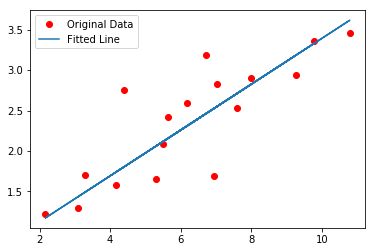

In [53]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch: %04d" % (epoch+1), "Cost: {:0.9f}".format(c), "W:", sess.run(W), "b:", sess.run(b))
    
    print('Optimization finished!')
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print('Cost:', training_cost, "W:", sess.run(W), "b:", sess.run(b))
    
    plt.plot(train_X, train_Y, 'ro', label="Original Data")
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label="Fitted Line")
    plt.legend()
    plt.show()